<div class="alert alert-block alert-success"><b>Problem 1:</b> Graph the feasible region for the system of inequalities. Tell
whether the region is bounded or unbounded.
    <br>x + y ≤ 5
    <br>x − y ≤ − 2
    <br>6x + y ≥ 0
    <br>
    <br></div>



<div class="alert alert-block alert-info"><b>Note:</b> In the last module we solved a system of equations using sympy. In this module, we will take a look at solving this using <i>linalg.solve</i> from the <i>numpy</i> library. For example, to <i>solve</i> for x0 and x1 in the system of equations 3 * x0 + x1 = 9 and x0 + 2 * x1 = 8, you would set it up as follows:
    
<code>
>>> a = np.array([[3,1], [1,2]])
>>> b = np.array([9,8])
>>> x = np.linalg.solve(a, b)
>>> x
array([2.,  3.])

</code>
   For more details see: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html
</div>

In [1]:
%matplotlib inline

import matplotlib.pyplot 
from matplotlib.pyplot import *
import numpy 
from numpy import arange

The simplest approach for filling a polygon is to locate thecorner points. Matplotlib will fill within these points.


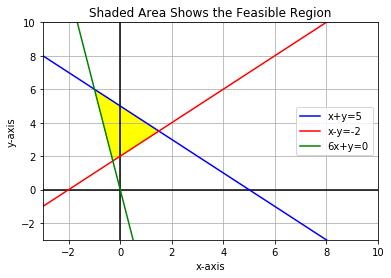

In [50]:
figure()
x= arange(-3,10.1,0.1)
y1= (x/2)-3
y2= x+2
y3=-6*x

xlim(-3,10)
ylim(-3,10)
hlines(0,-3,10,color='k')
vlines(0,-3,10,color='k')
grid(True)

xlabel('x-axis')
ylabel('y-axis')
title ('Shaded Area Shows the Feasible Region')

plot(x,y1,color='b')
plot(x,y2,color='r')
plot(x,y3,color='g')
legend(['x+y=5','x-y=-2','6x+y=0'])
print("The simplest approach for filling a polygon is to locate the\
corner points. Matplotlib will fill within these points.")

# linalg.solve to find the points of intersection
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html
a1 = np.array([[1,1], [1,-1]])
b1 = np.array([5,-2])
c1 = np.linalg.solve(a1, b1)

a2 = np.array([[1,1], [6, 1]])
b2 = np.array([5,0])
c2 = np.linalg.solve(a2, b2)

a3 = np.array([[1,-1], [6,1]])
b3 = np.array([-2,0])
c3 = np.linalg.solve(a3, b3)

# Matplotlib colors
# https://matplotlib.org/examples/color/named_colors.html

x= [c1[0], c2[0], c3[0]]
y= [c1[1], c2[1], c3[1]]
fill(x,y,color="yellow")
show()

<div class="alert alert-block alert-success"><b>Problem 2: </b>A company produces handmade shawls and afghans. They spin the yarn, dye it, and then weave it. A shawl requires 1 hour of spinning, 1 hour of dyeing, and 1 hour of weaving. An afghan requires 1 hour of spinning, 4 hours of dyeing, and 2 hours of weaving. There are at most 7 hours available each day for spinning, 12 hours for dyeing, and 8 hours for weaving. Graph the feasible region</div>

<div class="alert alert-block alert-info"><b>Solution:</b>Let x be the number of shawls and y be the number of afghans. <br><br>The system of inequalities is as shown below:<br>
    x + y ≤ 7 <br>
x + 4y ≤ 12 <br>
x + 2y ≤ 8 <br>

</div>

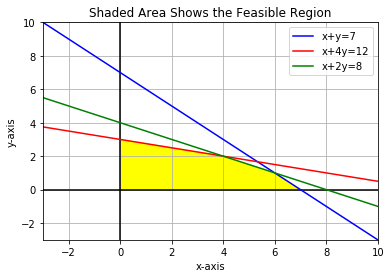

In [48]:
figure()
x= arange(-3,10.1,0.1)
y1= 7-x
y2= (12-x)/4
y3= (8-x)/2 

xlim(-3,10)
ylim(-3,10)
hlines(0,-3,10,color='k')
vlines(0,-3,10,color='k')
grid(True)

xlabel('x-axis')
ylabel('y-axis')
title ('Shaded Area Shows the Feasible Region')

plot(x,y1,color='b')
plot(x,y2,color='r')
plot(x,y3,color='g')
legend(['x+y=7','x+4y=12','x+2y=8'])

# linalg.solve to find the points of intersection
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html
a1 = np.array([[1,4], [1,0]])
b1 = np.array([12,0])
c1 = np.linalg.solve(a1, b1)

a2 = np.array([[1,4], [1, 2]])
b2 = np.array([12,8])
c2 = np.linalg.solve(a2, b2)

a3 = np.array([[1,1], [1,2]])
b3 = np.array([7,8])
c3 = np.linalg.solve(a3, b3)

a4 = np.array([[1,1], [0,1]])
b4 = np.array([7,0])
c4 = np.linalg.solve(a4, b4)


# Matplotlib colors
# https://matplotlib.org/examples/color/named_colors.html

x= [c1[0], c2[0], c3[0], c4[0], 0]
y= [c1[1], c2[1], c3[1], c4[1], 0]
fill(x,y,color="yellow")
show()

<div class="alert alert-block alert-success"><b>Problem 4: </b>Solve the following linear programming problem.
<br>Maximize: z = 10x + 12y
<br>subject to: 3x + 8y ≤ 24
<br>10x + y ≤ 24
x ≥ 0, y ≥ 0
</div>

In [15]:
!pip install pulp

     |████████████████████████████████| 40.6 MB 15.3 MB/s eta 0:00:01


In [28]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# declare your variables
x = LpVariable("x", 0, None) # x>=0
y = LpVariable("y", 0, None) # y>=0
z = LpVariable("z", 0, None) # z>=0
# defines the problem
prob = LpProblem("problem", LpMaximize)

# defines the constraints
prob += x + y + z <= 210
prob += x - 2*y >= 0
prob += z >= 30
# defines the objective function to maximize
prob += 250*x + 1200*y + 750*z

# solve the problem
status = prob.solve()
LpStatus[status]

# print the results (integer values)
print("The maximum occurs at the point (",(value(x)),",",(value(y)),",",(value(z)),")")

print("Maximum revenue is",(250*value(x) + 1200*value(y) + 750*value(z)))


The maximum occurs at the point ( 0.0 , 0.0 , 210.0 )
Maximum revenue is 157500.0


<div class="alert alert-block alert-success"><b>Problem 6:</b>
A patient takes vitamin pills. Each day he must have at least 180 IU of vitamin A, 4 mg of vitamin B1, and 140 mg of vitamin
C. He can choose between pill 1, which contains 90 IU of vitamin A, 1 mg of vitamin B1, and 20 mg of vitamin C, and pill 2,
which contains 30 IU of vitamin A, 1 mg of vitamin B1 , and 50 mg of vitamin C. Pill 1 costs 30 cents, and pill 2 costs 15 cents.How many of each pill should he buy in order to minimize his cost?
</div>

<div class="alert alert-block alert-info">Let <b>x</b>,<b>d</b>,<b>t</b> and <b>h</b> be the number of singles, doubles, triples and home runs the player hit. <br/>
    
Minimize: c = 30p1 + 15p2 <br>
subject to: 90p1 + 30p2 ≥ 180 <br>
p1 + p2 ≥ 4 <br>
20p1 + 50p2 ≥ 140 <br>
x ≥ 0, y ≥ 0 <br>

Lets use the <i>solve</i> function again.
</div>

In [46]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# declare your variables
p1 = LpVariable("p1", 0, None) # x>=0
p2 = LpVariable("p2", 0, None) # y>=0

# defines the problem
prob = LpProblem("problem", LpMinimize)

# defines the constraints
prob += 90*p1 + 30*p2 >= 180
prob += p1 + p2 >= 4 
prob += 20*p1 + 50*p2 >= 140 

# defines the objective function to maximize
prob += 30*p1 + 15*p2

# solve the problem
status = prob.solve()
LpStatus[status]

# print the results (integer values)
print("He should buy",int(value(p1)),"of pill 1 and ",int(value(p2))," of pill 2.")
print("The minimum cost is $",(30*value(p1)/100) + 15* (value(p2)/100))


He should buy 1 of pill 1 and  3  of pill 2.
The minimum cost is $ 0.75


<div class="alert alert-block alert-success"><b> Problem 15.</b>
A company's lawn seed mixtures contain three types of seeds: bluegrass, rye, and Bermuda. The costs per pound of the
three types are 11 cents, 14 cents, and 6 cents, respectively. In each batch there must be at least 20% bluegrass seed
and the amount of must be no more than two-thirds the amount of rye. To fill current orders the company must
make at least 9000 pounds of the mixture. How much of each kind of seed should be used to minimize cost?    
</div>

<div class="alert alert-block alert-info">
   **Solution:**Let x be the pounds of bluegrass seed <br>
Let y be the pounds of rye seed <br>
Let z be the pounds of Bermuda seed <br>

Cost to be minimized = 0.11 x + 0.14 y + 0.06 z <br>
Subject to:
* x ≥ 0.20(x + y + z) 
* z ≤ 2/3 y 
* x + y + z ≥ 9000 
* x ≥ 0 y ≥ 0 z ≥ 0 
 
</div>

In [23]:
from pulp import LpVariable, LpProblem, LpMaximize, GLPK, LpStatus, value, LpMinimize

model = LpProblem("problem", LpMinimize)
x = LpVariable("x", 0, None) # x >= 0
y = LpVariable("y", 0, None) # y >= 0
z = LpVariable("z", 0, None) # z >= 0

model += 0.80*x - 0.20*y - 0.20*z >= 0
model += 2/3*y - z >= 0
model += x + y + z >= 8000

model += 0.12*x + 0.15*y + 0.03*z

# solve the problem
status = model.solve()
LpStatus[status]

print('Pounds of Bluegrass to be used = {}'.format(value(x),'%d'))
print('Pounds of Rye to be used = {}'.format(value(y),'%d'))
print('Pounds of Bermuda to be used = {}'.format(value(z),'%d'))

minimum_cost = 0.12 * value(x) + 0.15 * value(y) + 0.03 * value(z) 

print('Minimum Cost is {}'.format(minimum_cost,'%.2f'))


Pounds of Bluegrass to be used = 1600.0
Pounds of Rye to be used = 3840.0
Pounds of Bermuda to be used = 2560.0
Minimum Cost is 844.8


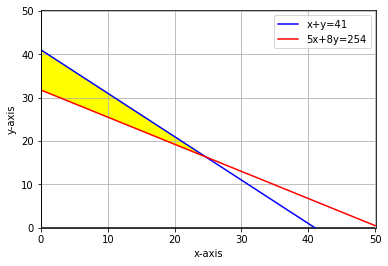

In [12]:
figure()
x= arange(0,50.1,0.1)
y1= -x+41
y2= (-5/8)*x+(254/8)


xlim(0,50.1)
ylim(0,50.1)
hlines(0,0,50,color='k')
vlines(0,0,50,color='k')
grid(True)

xlabel('x-axis')
ylabel('y-axis')


plot(x,y1,color='b')
plot(x,y2,color='r')
legend(['x+y=41','5x+8y=254'])

# linalg.solve to find the points of intersection
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html
a1 = np.array([[1,1], [5,8]])
b1 = np.array([41,254])
c1 = np.linalg.solve(a1, b1)
print(c1)


# Matplotlib colors
# https://matplotlib.org/examples/color/named_colors.html

x= [0,0,c1[0]]
y= [41,31.75,c1[1]]
fill(x,y,color="yellow")
show()

In [2]:
from pulp import LpVariable, LpProblem, LpMaximize, GLPK, LpStatus, value, LpMinimize

model = LpProblem("problem", LpMinimize)
x = LpVariable("x", 0, None) # x >= 0
y = LpVariable("y", 10, None) # y >= 0

model += x + y <= 45
model += y - (3/2)*x <= 0
model += x + y >= 30

model += 2400*x + 1100*y 

# solve the problem
status = model.solve()
LpStatus[status]

print('Number of Teachers = {}'.format(value(x),'%d'))
print('Number of TAs = {}'.format(value(y),'%d'))

minimum_cost = 2400 * value(x) + 1100 * value(y)  

print('Minimum Cost is {}'.format(minimum_cost,'%.2f'))


Number of Teachers = 12.0
Number of TAs = 18.0
Minimum Cost is 48600.0


In [5]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# declare your variables
p1 = LpVariable("p1", 0, None) # x>=0
p2 = LpVariable("p2", 0, None) # y>=0
p3 = LpVariable("p3", 0, None) # z>=0
# defines the problem
prob = LpProblem("problem", LpMinimize)

# defines the constraints
prob += 4*p1 + 1*p2 + 10*p3 >= 10
prob += 3*p1 + 2*p2 + 1*p3 >= 12 
prob += 4*p2 + 5*p3 >= 20 

# defines the objective function to minimize
prob += .06*p1 + .08*p2 + .01*p3

# solve the problem
status = prob.solve()
LpStatus[status]

# print the results (integer values)
print("He should buy",int(value(p1)),"of pill 1, ",int(value(p2))," of pill 2, and ",int(value(p3))," of pill3.")
print("The minimum cost is $",(.06*value(p1)) + .08* (value(p2)) + .01*(value(p3)))


He should buy 0 of pill 1,  0  of pill 2, and  12  of pill3.
The minimum cost is $ 0.12


In [4]:
from pulp import LpVariable, LpProblem, LpMaximize, GLPK, LpStatus, value, LpMinimize

model = LpProblem("problem", LpMaximize)
x = LpVariable("x", 0, None) # x >= 0
y = LpVariable("y", 0, None) # y >= 0

model += 2.4*x + .8*y <= 141
model += x + y <= 100
model += x <= 54
model += y <= 85

model += .037*x +.031*y 

# solve the problem
status = model.solve()
LpStatus[status]

print('Dairy 1 = {}'.format(value(x),))
print('Dairy 2 = {}'.format(value(y),))

maximum_cost = .037 * value(x) + .031 * value(y)  

print('Maximize Butterfat is {}'.format(maximum_cost,'%.2f'))


Dairy 1 = 38.125
Dairy 2 = 61.875
Maximize Butterfat is 3.3287500000000003
